Simple Sine Wave Data:


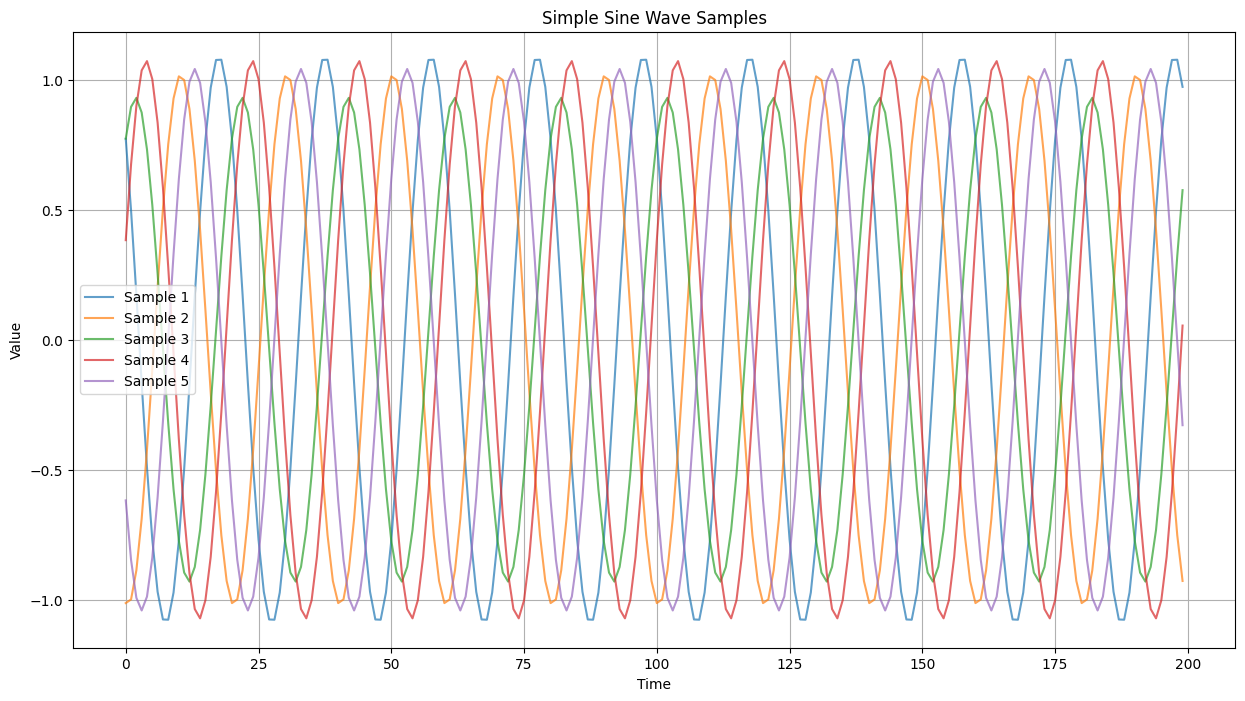

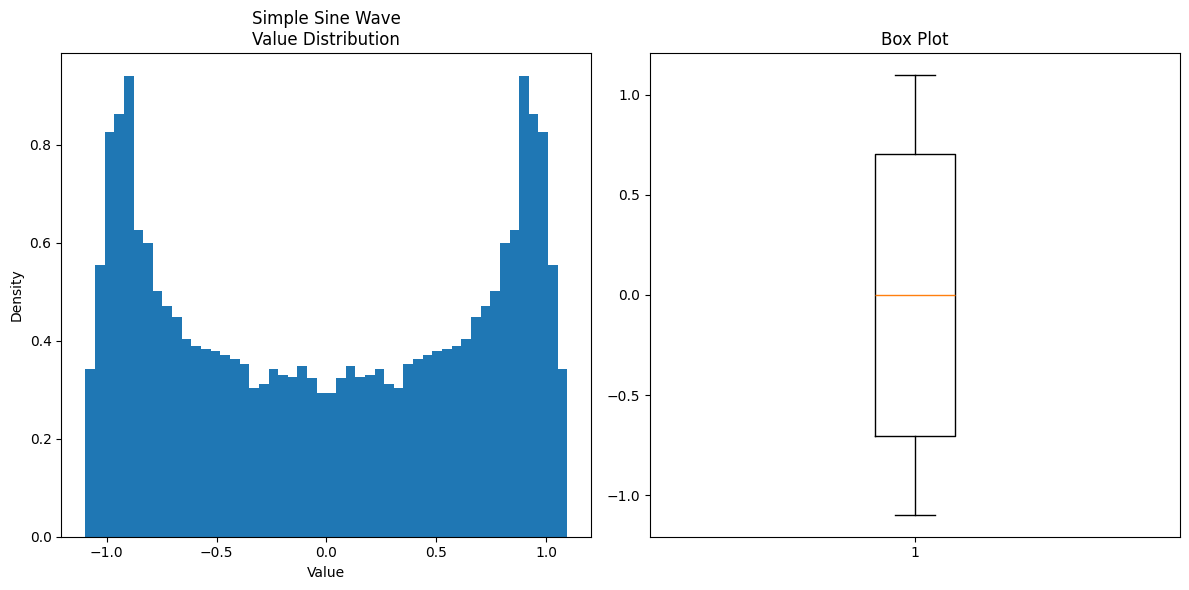

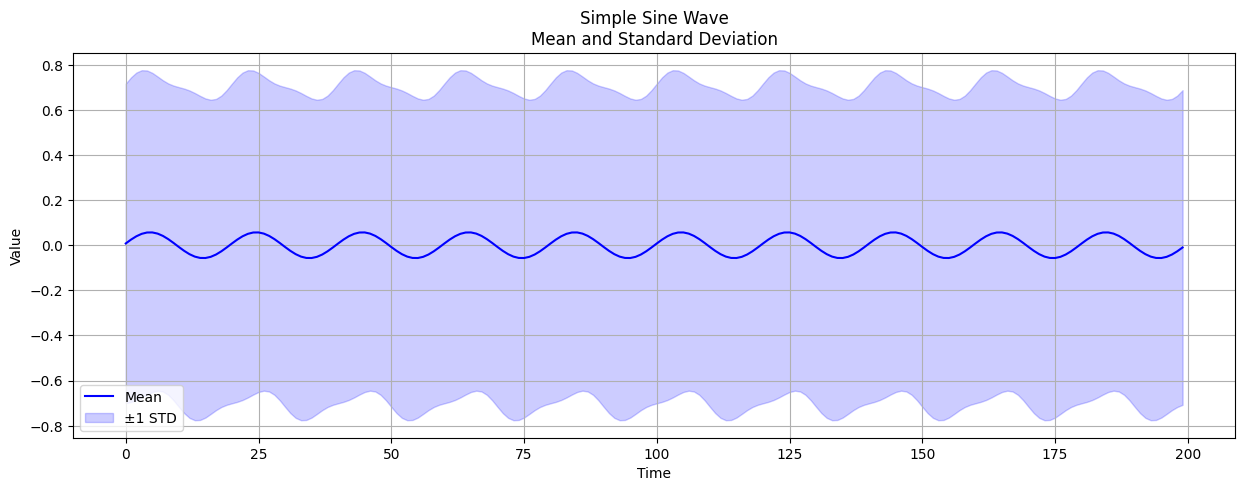


Composite Sine Wave Data:


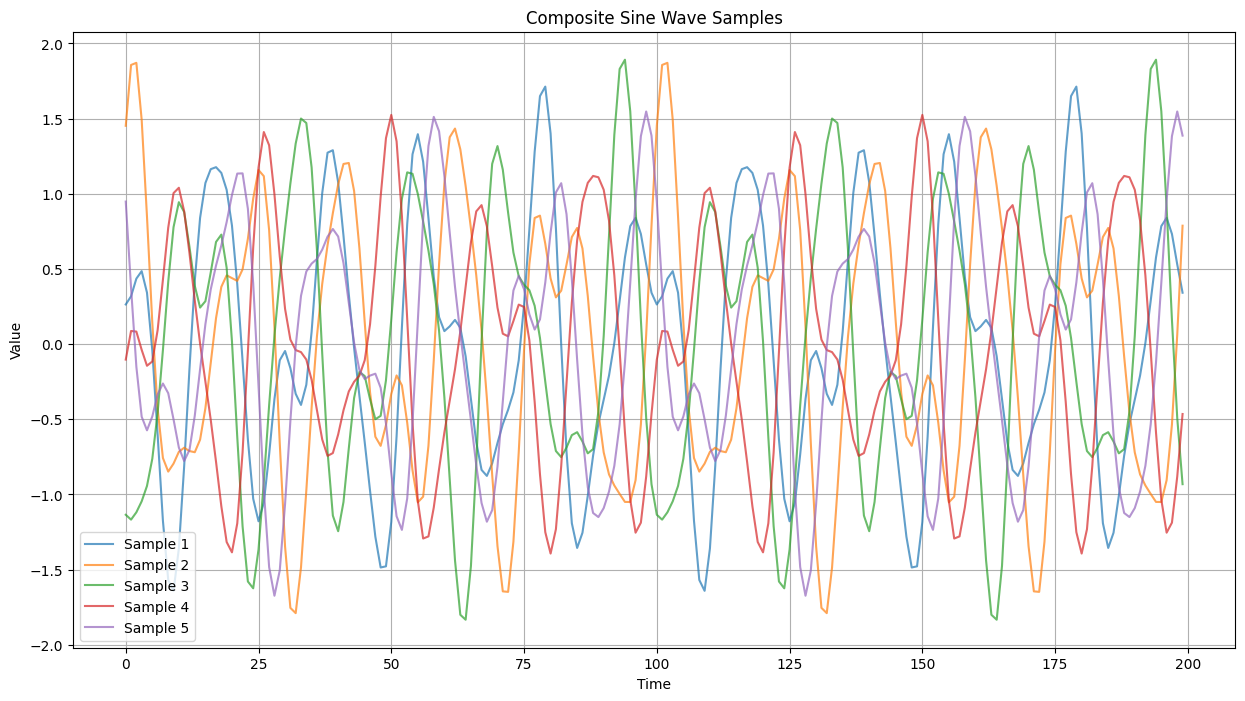

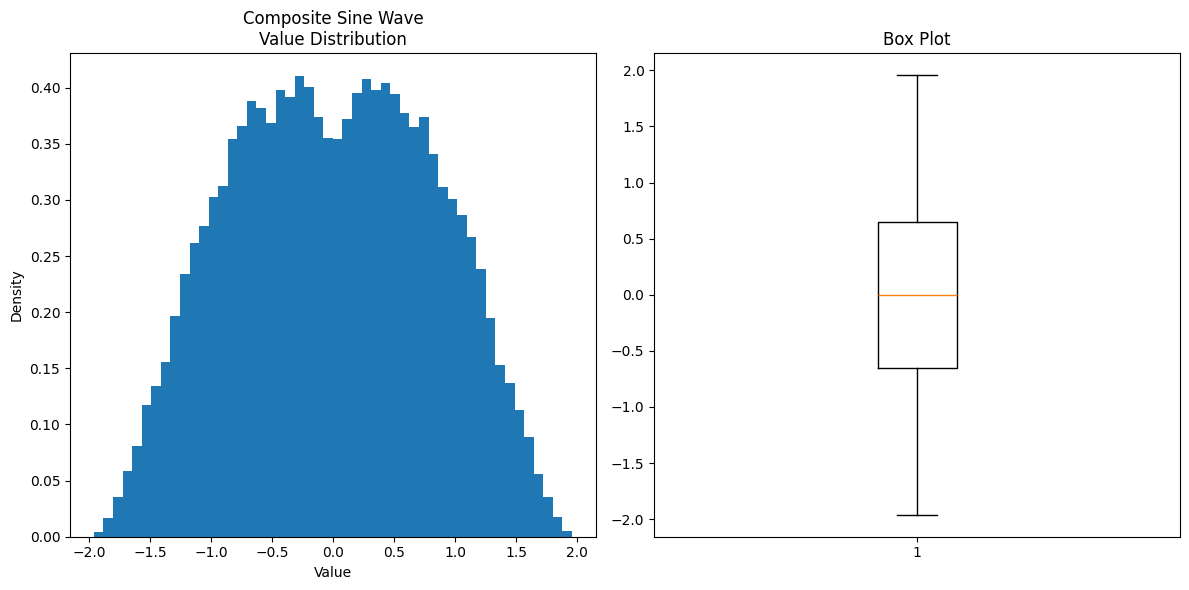

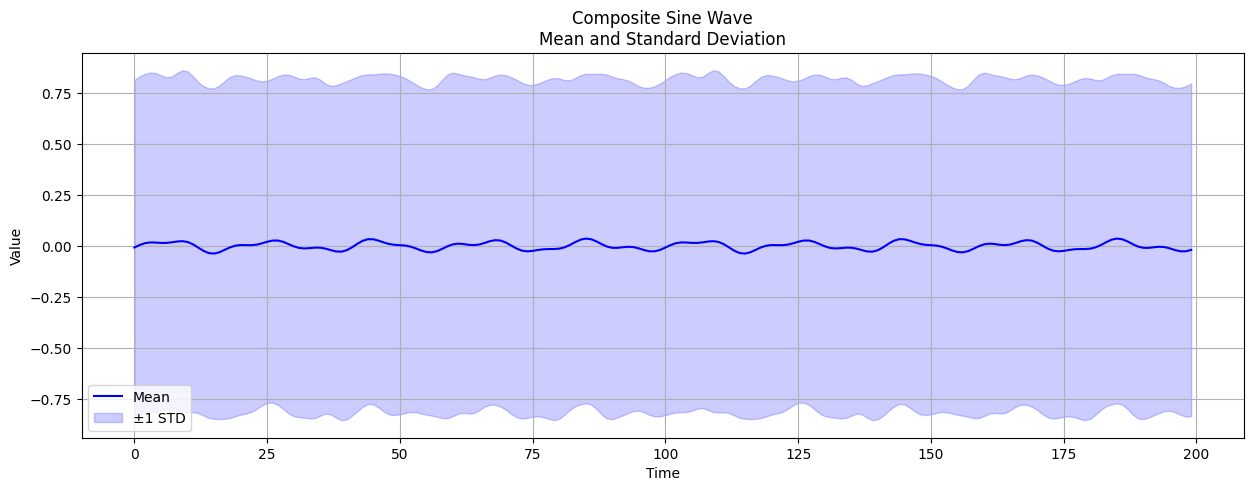

In [1]:
import sys
sys.path.append('../src')

from synth_data_generators.stationary import SineWaveGenerator, CompositeSineGenerator
from utils.visualization import plot_time_series_samples, plot_data_distribution, plot_statistics

# Generate simple sine wave data
sine_gen = SineWaveGenerator(
    seq_length=200,
    num_samples=1000,
    freq=0.05,
    amplitude=1.0
)
sine_data = sine_gen.generate()

# Generate composite sine wave data
composite_gen = CompositeSineGenerator(
    seq_length=200,
    num_samples=1000,
    frequencies=[0.05, 0.08, 0.12],
    amplitudes=[1.0, 0.5, 0.3]
)
composite_data = composite_gen.generate()

# Visualize the data
print("Simple Sine Wave Data:")
plot_time_series_samples(sine_data, title="Simple Sine Wave Samples")
plot_data_distribution(sine_data, title="Simple Sine Wave")
plot_statistics(sine_data, title="Simple Sine Wave")

print("\nComposite Sine Wave Data:")
plot_time_series_samples(composite_data, title="Composite Sine Wave Samples")
plot_data_distribution(composite_data, title="Composite Sine Wave")
plot_statistics(composite_data, title="Composite Sine Wave")

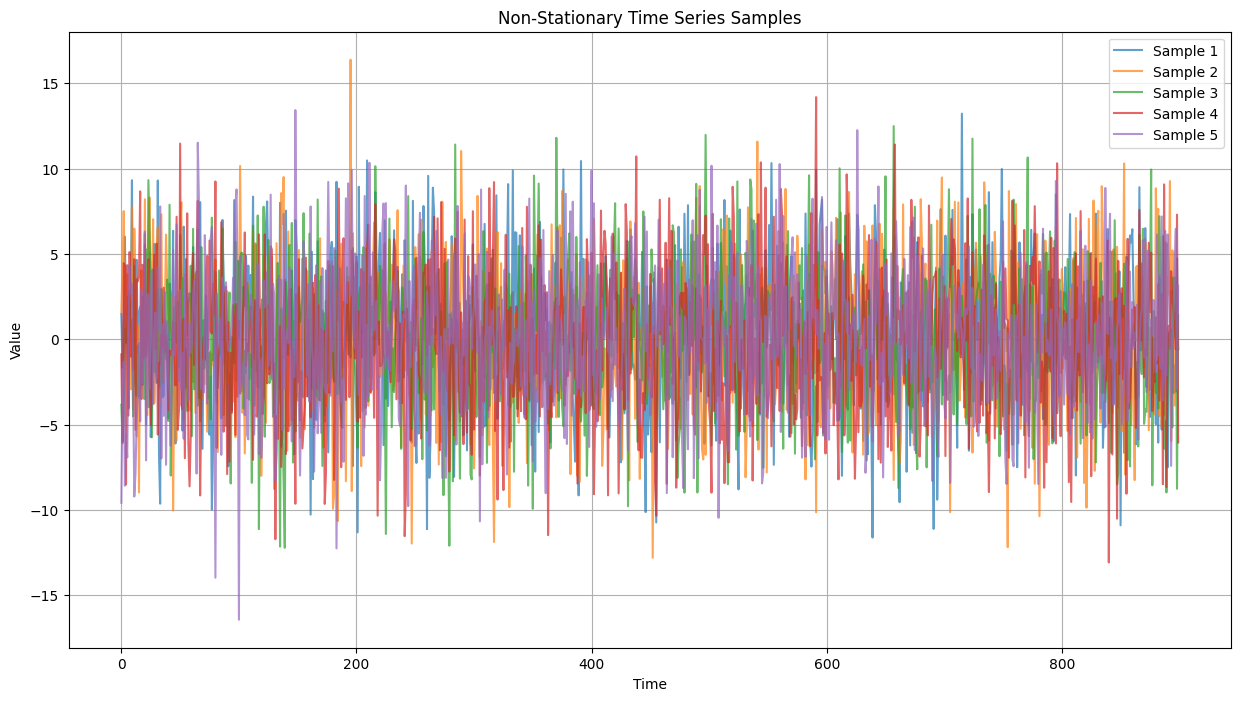

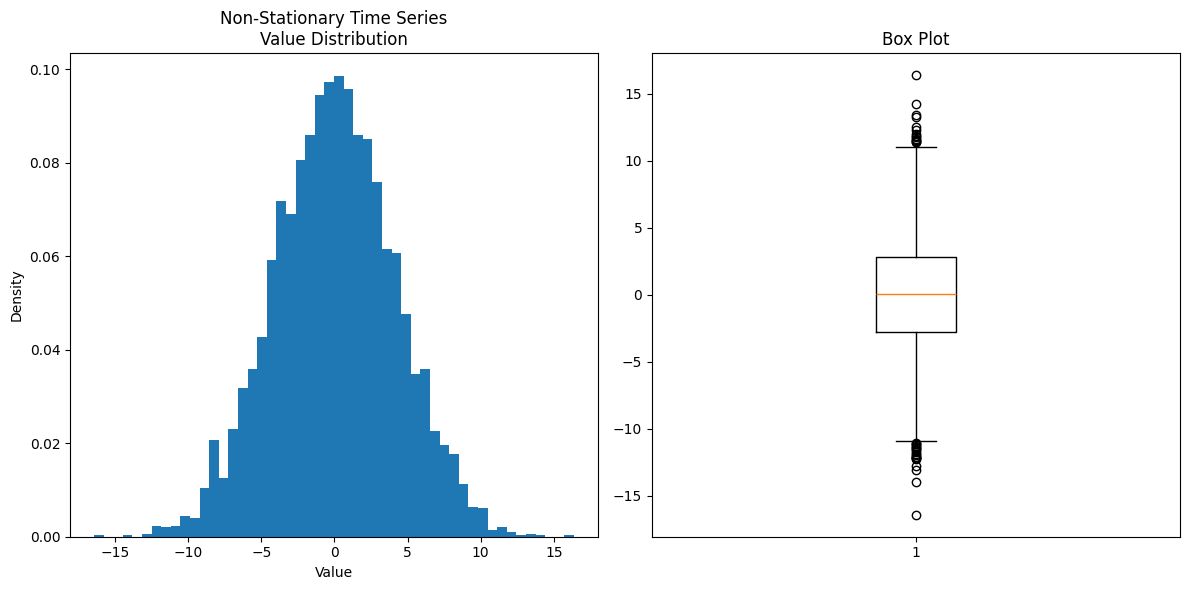

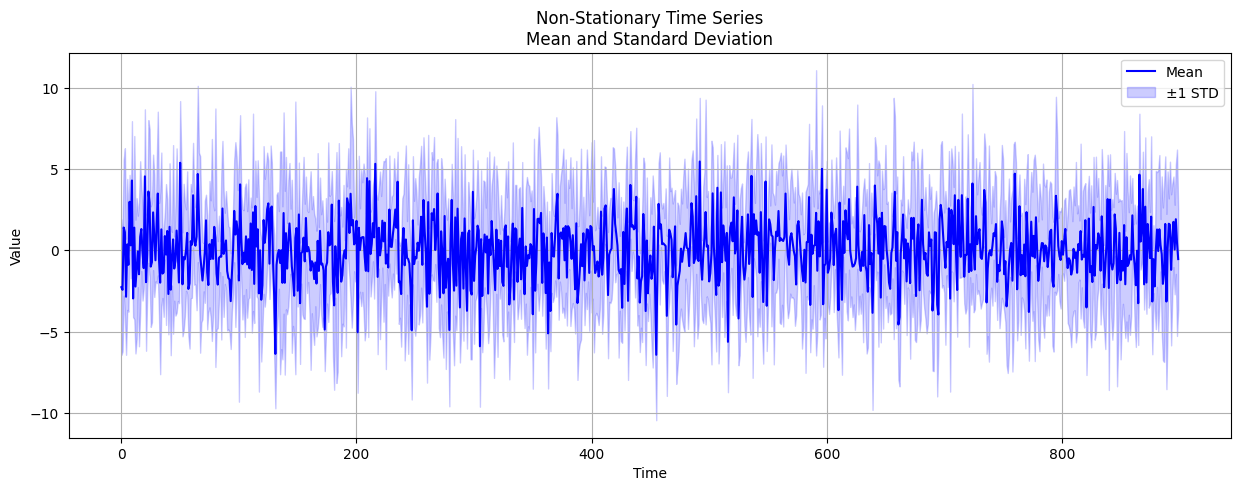

In [2]:
from synth_data_generators.nonstationary import ARNonstationaryGenerator

# Instantiate the generator
generator = ARNonstationaryGenerator(seq_length=900, num_samples=5, seed=42)

# Generate the data
data = generator.generate()

plot_time_series_samples(data, title="Non-Stationary Time Series Samples")
plot_data_distribution(data, title="Non-Stationary Time Series")
plot_statistics(data, title="Non-Stationary Time Series")


Demonstrating Non-stationary Patterns:


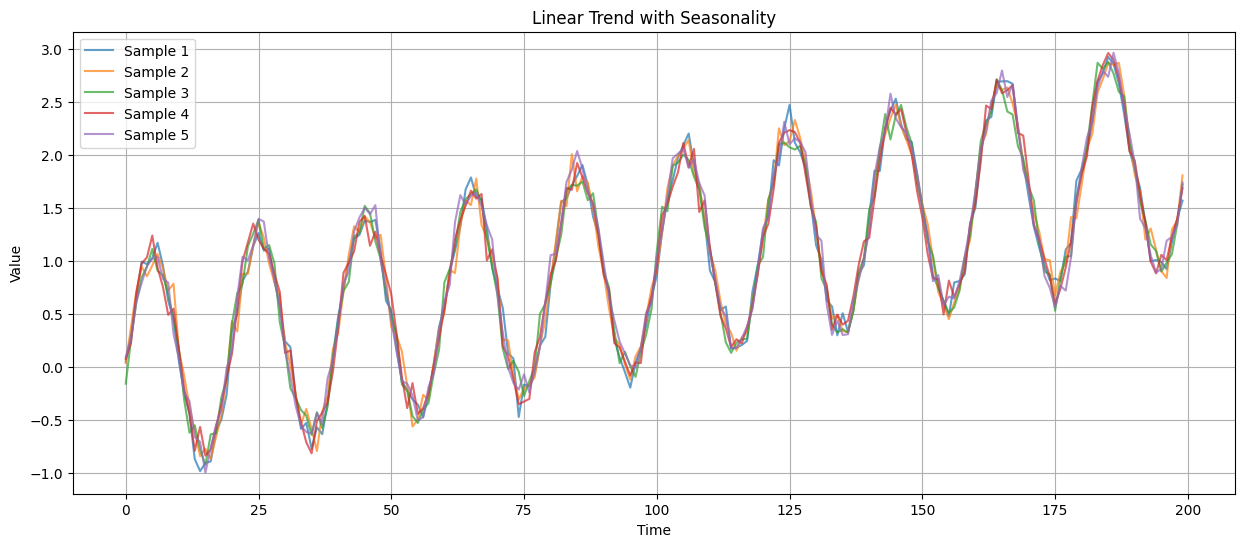

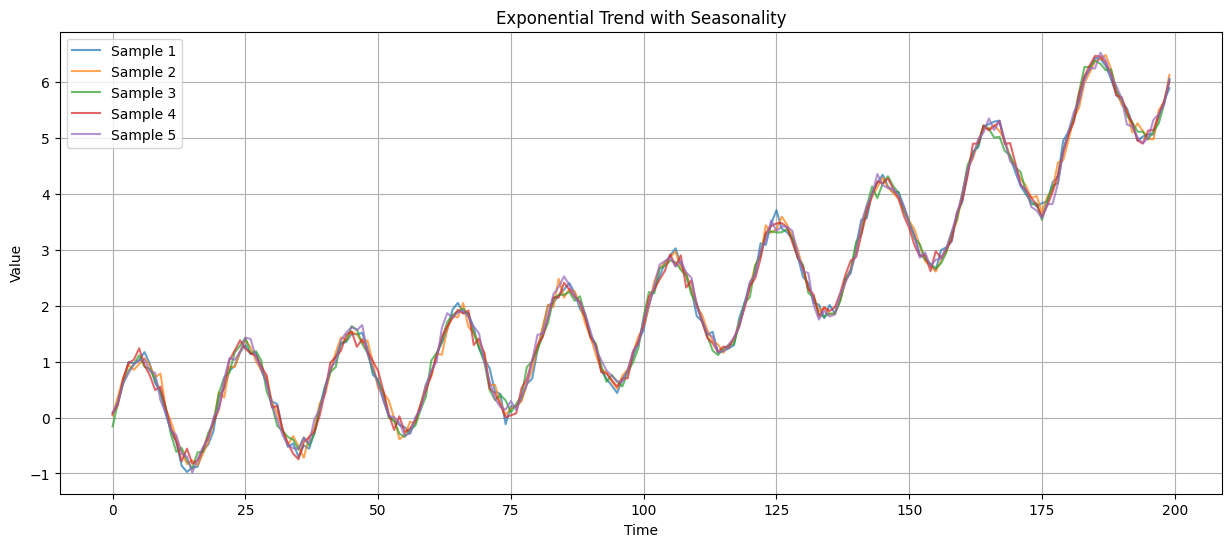

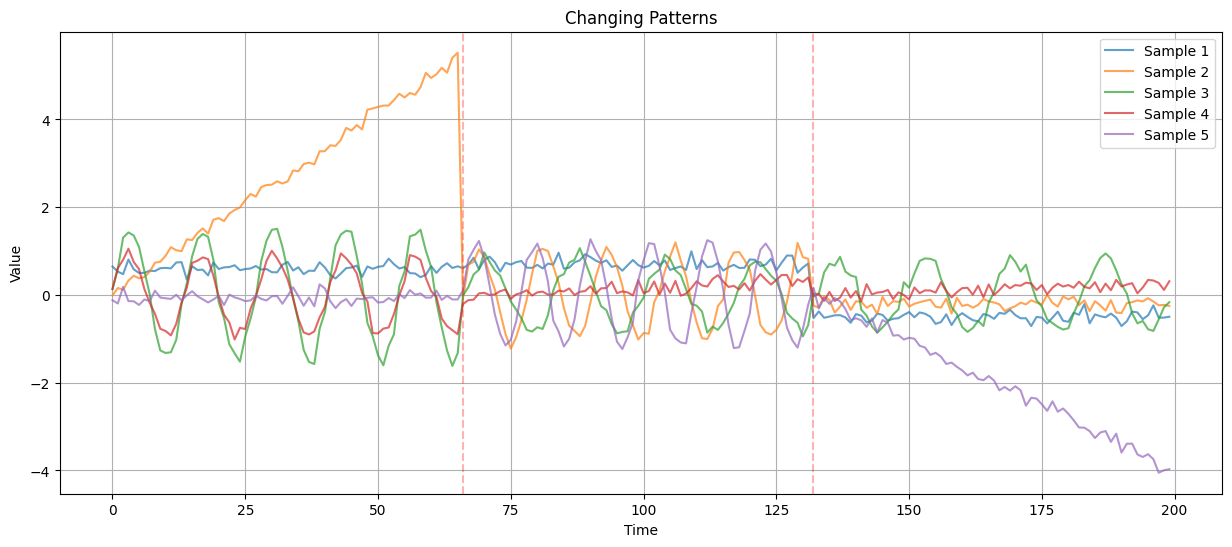


Demonstrating Different Noise Types:


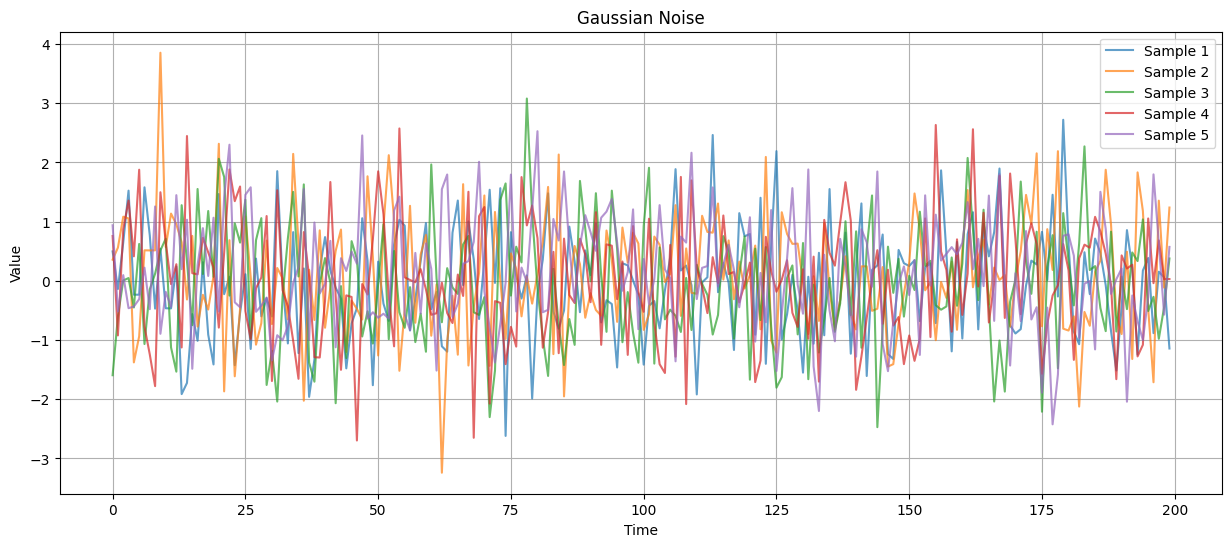

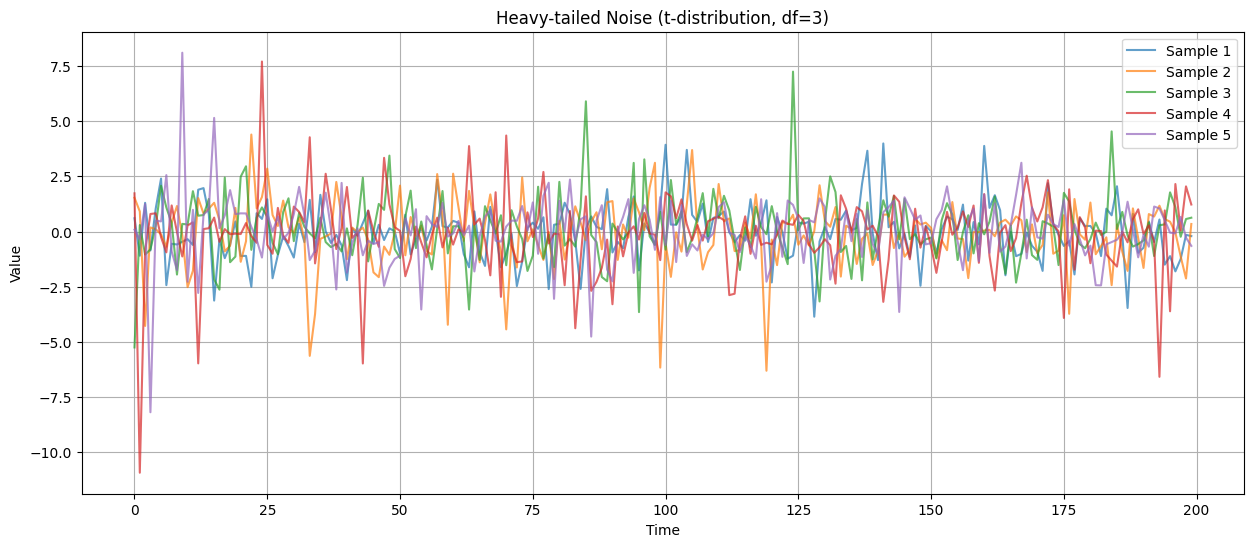

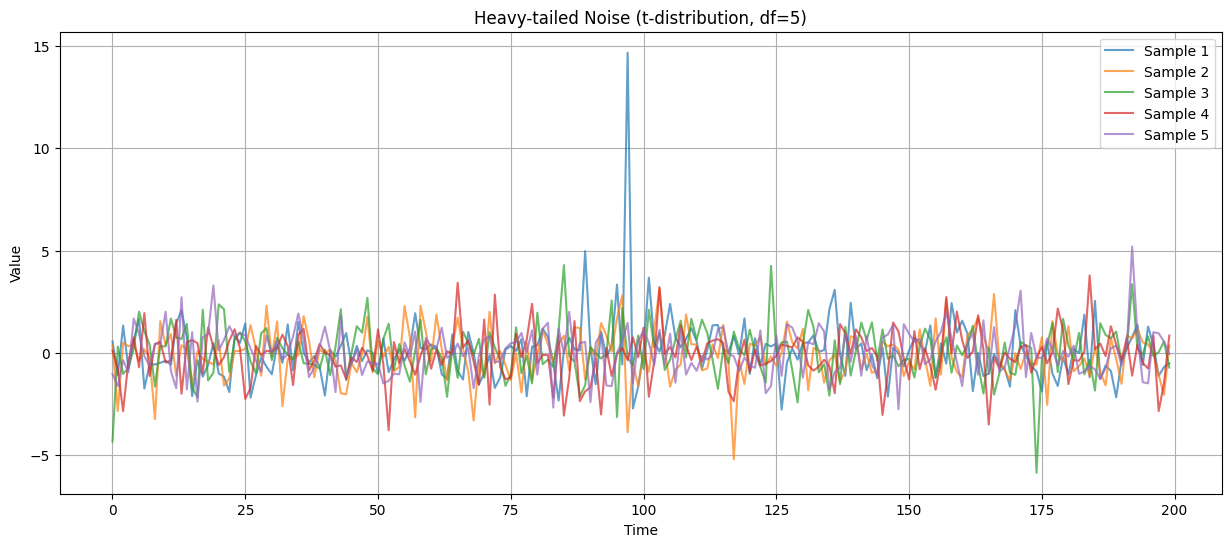

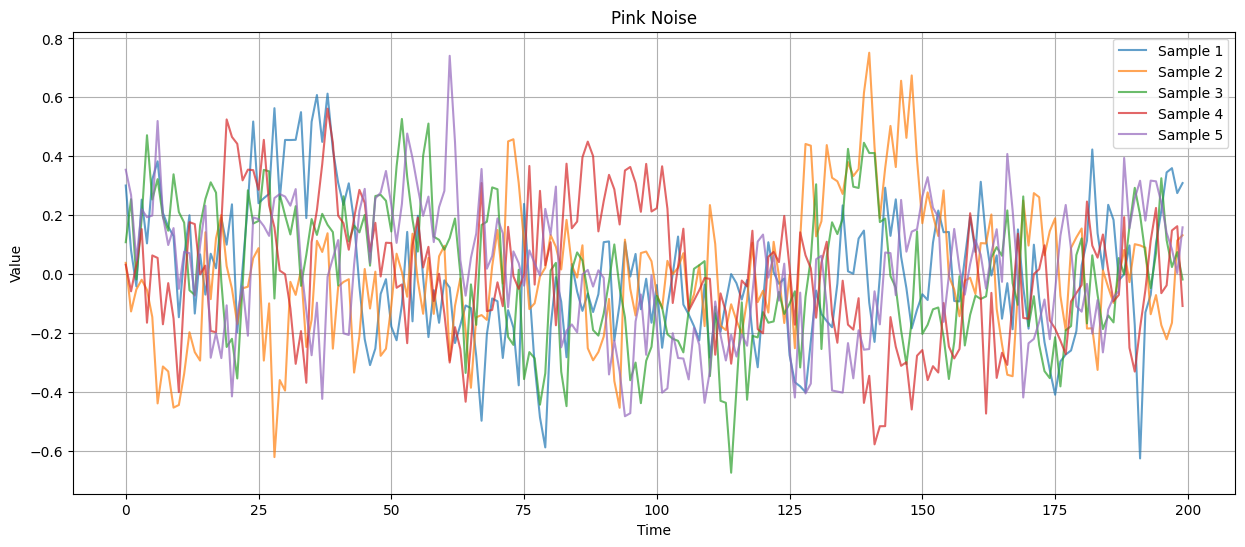

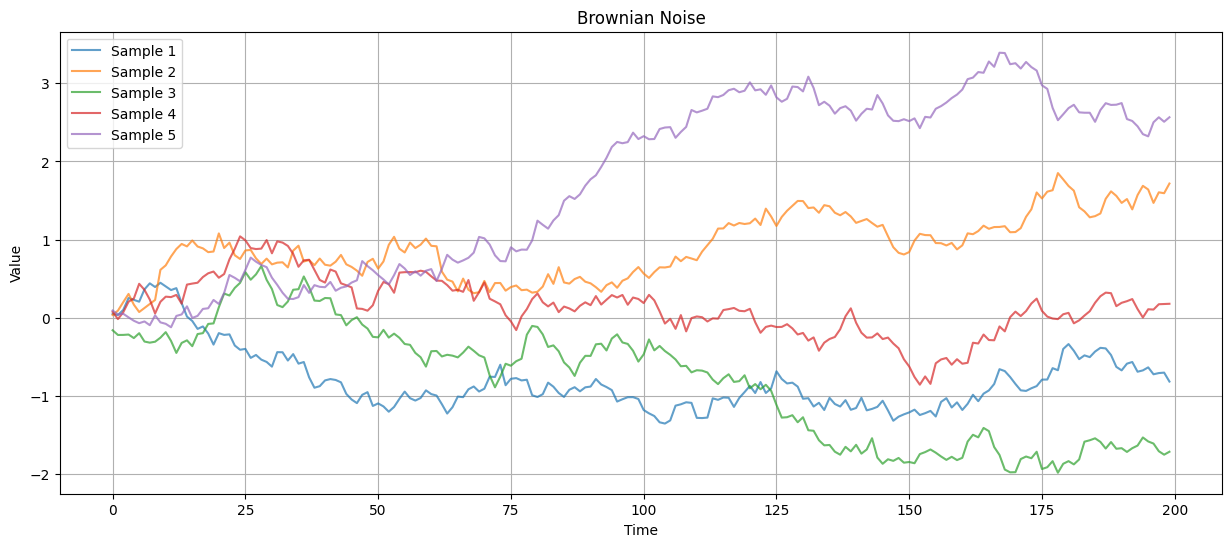

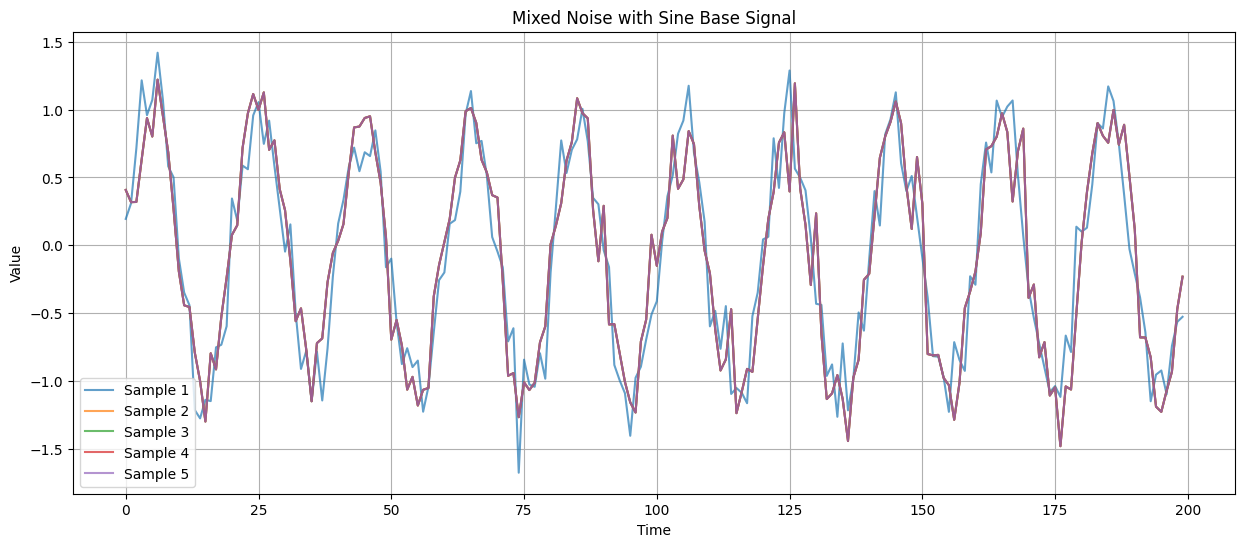


Demonstrating Statistical Patterns:


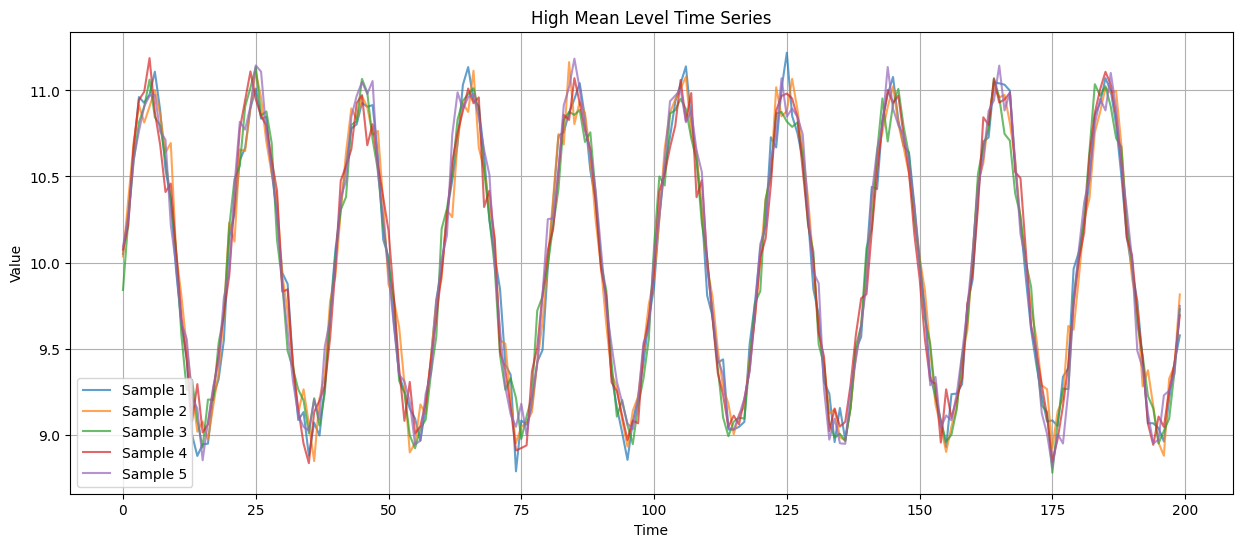

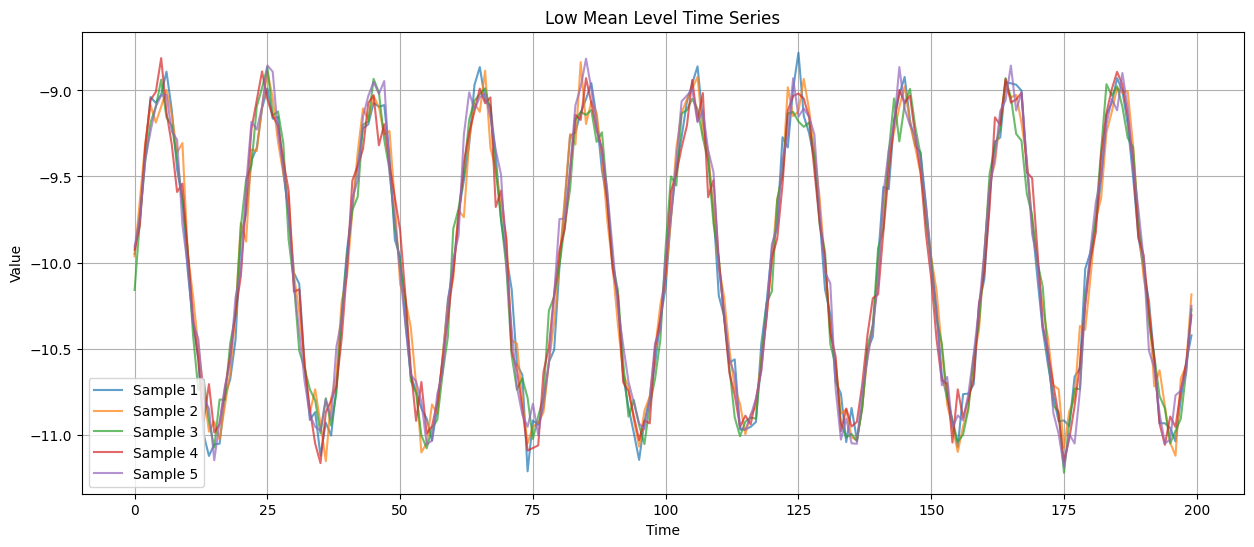

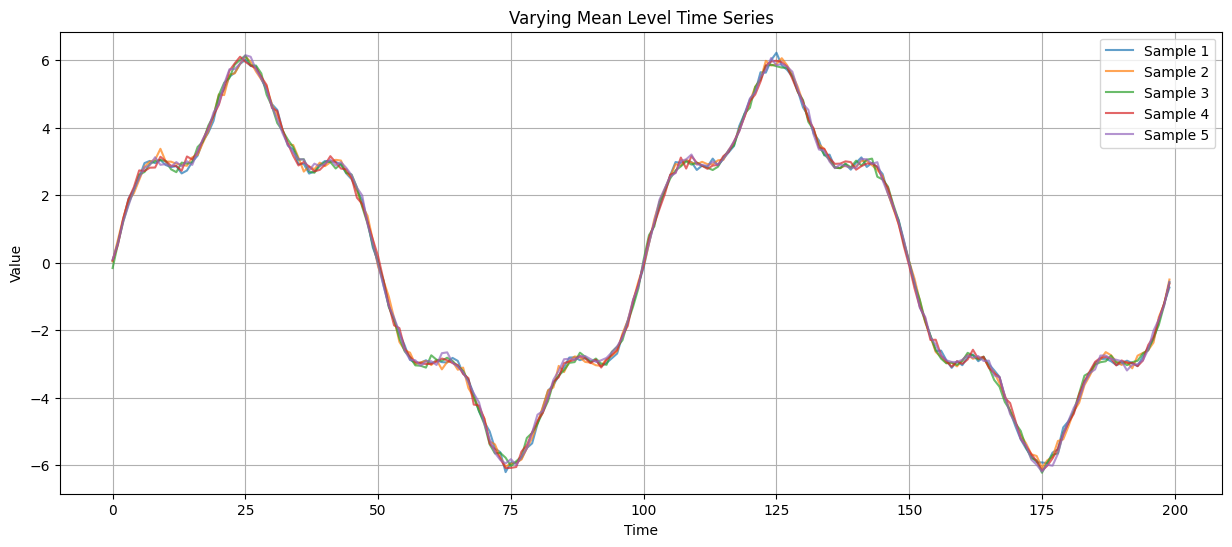

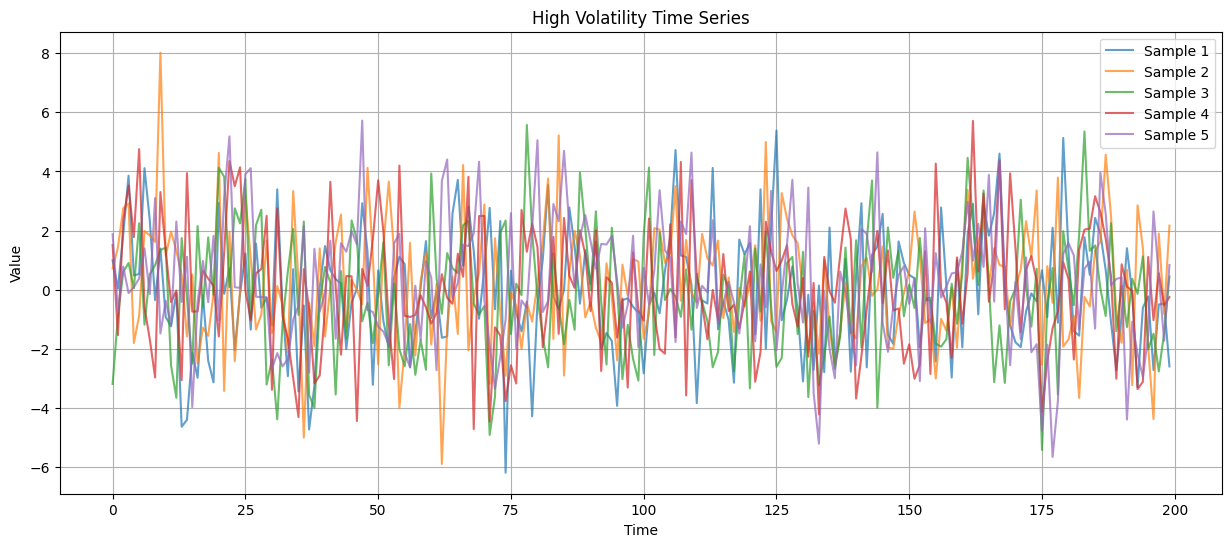

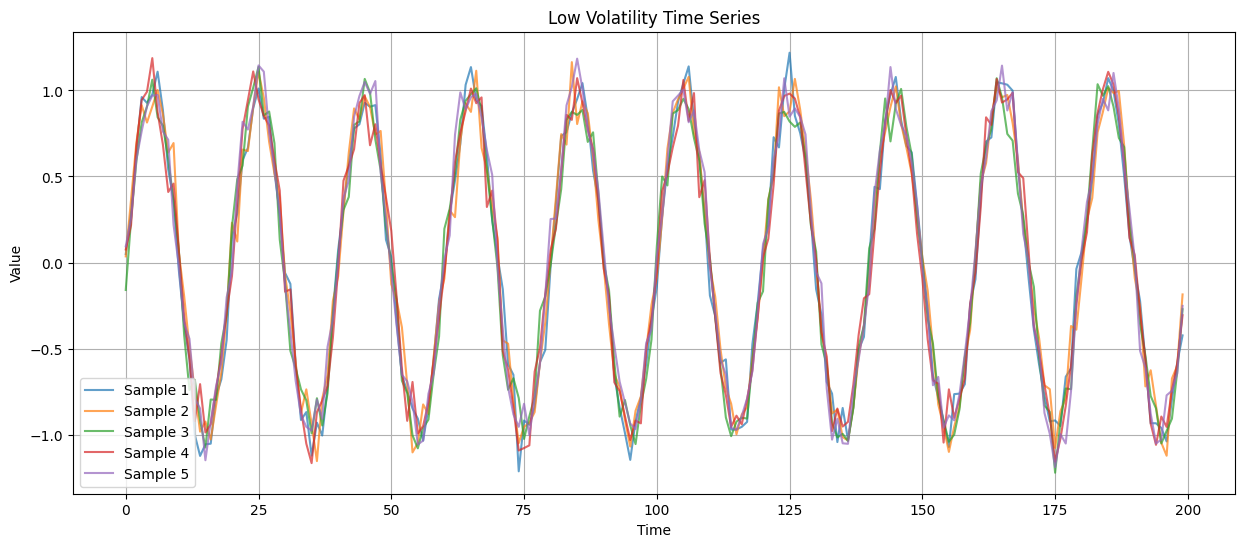

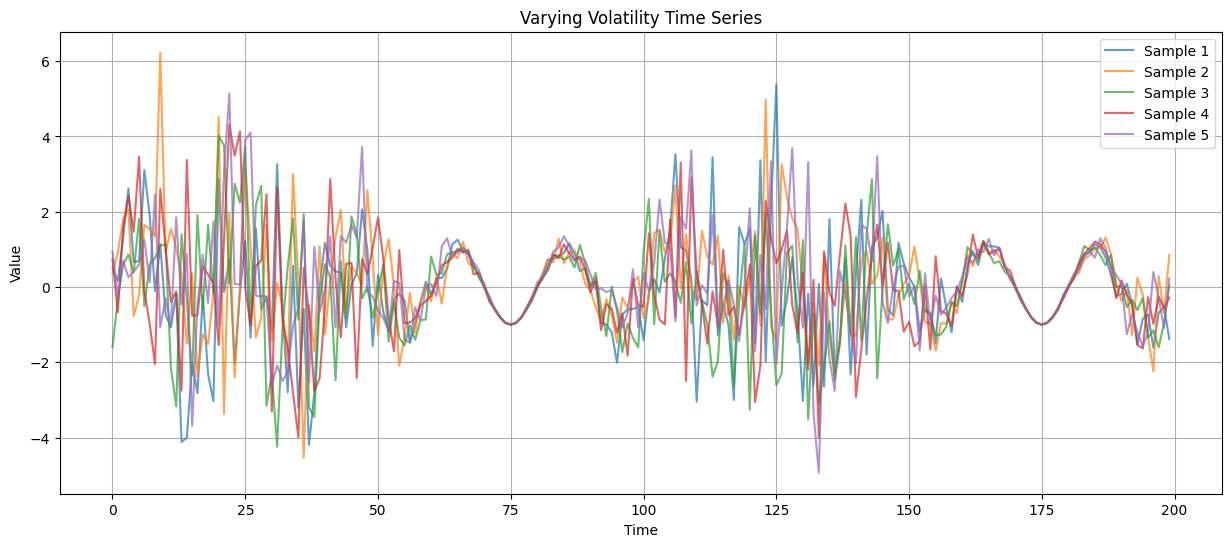

In [3]:
import sys
sys.path.append('../src')
import matplotlib.pyplot as plt
import numpy as np

from synth_data_generators.nonstationary import TrendGenerator, ChangingPatternGenerator
from synth_data_generators.noise import NoiseGenerator, MixedNoiseGenerator
from synth_data_generators.statistical_patterns import VaryingMeanGenerator, VaryingVolatilityGenerator

# Common plotting function
def plot_samples(data, title, segment_points=None):
    plt.figure(figsize=(15, 6))
    
    # Plot each sample
    for i in range(min(5, len(data))):
        plt.plot(data[i], alpha=0.7, label=f'Sample {i+1}')
    
    # Add segment boundaries if provided
    if segment_points is not None:
        for point in segment_points:
            plt.axvline(x=point, color='r', linestyle='--', alpha=0.3)
    
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# 1. Non-stationary Patterns
print("Demonstrating Non-stationary Patterns:")

# Linear trend with seasonality
trend_gen = TrendGenerator(trend_type='linear', seasonal_amplitude=1.0)
linear_trend_data = trend_gen.generate()
plot_samples(linear_trend_data, "Linear Trend with Seasonality")

# Exponential trend with seasonality
trend_gen = TrendGenerator(trend_type='exponential')
exp_trend_data = trend_gen.generate()
plot_samples(exp_trend_data, "Exponential Trend with Seasonality")

# Changing patterns
pattern_gen = ChangingPatternGenerator(change_points=2)
changing_pattern_data = pattern_gen.generate()
plot_samples(changing_pattern_data, "Changing Patterns", pattern_gen.segment_points)

print("\nDemonstrating Different Noise Types:")

# Gaussian noise
gaussian_gen = NoiseGenerator(noise_type='gaussian', noise_params={'std': 1.0})
gaussian_data = gaussian_gen.generate()
plot_samples(gaussian_data, "Gaussian Noise")

# Heavy-tailed noise with df=3 (very heavy tails)
heavy_gen = NoiseGenerator(
    noise_type='heavy_tailed',
    noise_params={'df': 3, 'scale': 1.0}
)
heavy_data = heavy_gen.generate()
plot_samples(heavy_data, "Heavy-tailed Noise (t-distribution, df=3)")

# Heavy-tailed noise with df=5 (moderately heavy tails)
heavy_gen_mod = NoiseGenerator(
    noise_type='heavy_tailed',
    noise_params={'df': 5, 'scale': 1.0}
)
heavy_data_mod = heavy_gen_mod.generate()
plot_samples(heavy_data_mod, "Heavy-tailed Noise (t-distribution, df=5)")

# Pink noise
pink_gen = NoiseGenerator(noise_type='pink')
pink_data = pink_gen.generate()
plot_samples(pink_data, "Pink Noise")

# Brownian noise
brownian_gen = NoiseGenerator(noise_type='brownian')
brownian_data = brownian_gen.generate()
plot_samples(brownian_data, "Brownian Noise")

# Add heavy-tailed noise to mixed noise generator
mixed_gen = MixedNoiseGenerator(base_signal='sine')
mixed_data = mixed_gen.generate()
plot_samples(mixed_data, "Mixed Noise with Sine Base Signal")

# 3. Statistical Patterns
print("\nDemonstrating Statistical Patterns:")

# High mean level
high_mean_gen = VaryingMeanGenerator(mean_level='high')
high_mean_data = high_mean_gen.generate()
plot_samples(high_mean_data, "High Mean Level Time Series")

# Low mean level
low_mean_gen = VaryingMeanGenerator(mean_level='low')
low_mean_data = low_mean_gen.generate()
plot_samples(low_mean_data, "Low Mean Level Time Series")

# Varying mean
varying_mean_gen = VaryingMeanGenerator(mean_level='varying')
varying_mean_data = varying_mean_gen.generate()
plot_samples(varying_mean_data, "Varying Mean Level Time Series")

# High volatility
high_vol_gen = VaryingVolatilityGenerator(volatility_type='high')
high_vol_data = high_vol_gen.generate()
plot_samples(high_vol_data, "High Volatility Time Series")

# Low volatility
low_vol_gen = VaryingVolatilityGenerator(volatility_type='low')
low_vol_data = low_vol_gen.generate()
plot_samples(low_vol_data, "Low Volatility Time Series")

# Varying volatility
varying_vol_gen = VaryingVolatilityGenerator(volatility_type='varying')
varying_vol_data = varying_vol_gen.generate()
plot_samples(varying_vol_data, "Varying Volatility Time Series")